# Imports 

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), '..', 'playground'))
sys.path.insert(0, os.path.join(os.getcwd(), '..', 'data', 'price'))
from price_data import *

In [2]:
import playground
import price_data
from trading_bot_class import *
import requests
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import utils
import time
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Main Run

In [14]:
def total_fitness(bot,data):
    """
    :param bot:
    :param data:
    :return:
    """
    for company_name,company_price,company_senti in data:
        company_fit = playground.evaluate_fitness(bot, company_price, company_senti)
        bot.add_fitness(company_fit)
        bot.reset_attributes(1000,company_name)
    print(bot.get_fitness())
    return bot.get_fitness()

## Settings/Data 

In [20]:
NUM_GENERATIONS = 100
NUM_BOTS = 20
START_AMT = 1000.0
histPathStr = os.path.join(os.getcwd(), '..', 'data', 'twitter', 'historical.csv')
## generate 100 random bots
bots = []
data = []

FB_price_data = price_data.get_google_finance_intraday('FB', period=600, days=70)
fb_tweets = playground.get_company_tweets(histPathStr, '(F|f)acebook')
data.append(('FB',FB_price_data,fb_tweets))

MSFT_price_data = price_data.get_google_finance_intraday('MSFT', period=600, days=70)
msft_tweets = playground.get_company_tweets(histPathStr, '(M|m)icrosoft')
data.append(('MSFT',MSFT_price_data,msft_tweets))

apple_price = price_data.get_google_finance_intraday('AAPL', period=600, days=70)
apple_tweets = playground.get_company_tweets(histPathStr, '(A|a)pple')
data.append(('AAPL',apple_price,apple_tweets))

/home/brandon/Desktop/StockBot/playground/../playground/playground.py:94: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  company_tweets = data.loc[data['Texts'].str.contains(company_regex, na=False)]


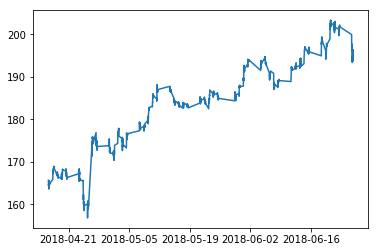

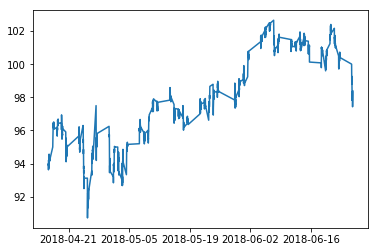

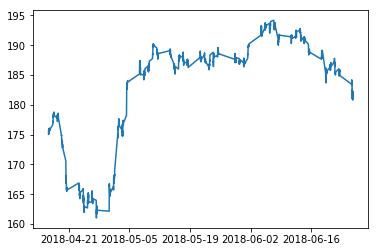

In [55]:
plt.plot(FB_price_data['Open'])
plt.show()
plt.plot(MSFT_price_data['Open'])
plt.show()
plt.plot(apple_price['Open'])
plt.show()

## Generate/Reset Bots 

In [21]:
for i in range(NUM_BOTS):
    bots.append(TradingBot(1000.0,'FB', utils.createDummy()))

In [57]:
for i, bot in enumerate(bots):
#         if i >= 7*len(bots)/20:
        bot.reset_attributes(1000, '', resetFitness=True)

##  Main

In [43]:
for generation_index in range(NUM_GENERATIONS):
    if i < 10:
        continue
        
#     utils.saveGeneration(bots, generation_index)
    startTime = time.time()
    average_fitness = []
    current_average = 0

    for i, bot in enumerate(bots):
        if i >= 7*len(bots)/20:
            current_average += total_fitness(bot,data)
        else :
            print(bot.fitness)
            current_average += bot.fitness
            
    current_average = current_average / float(NUM_BOTS)
#     utils.saveGeneration()

    average_fitness.append(current_average)
    growth = (current_average - 3*START_AMT) / START_AMT/ 3.0
    print(generation_index, 'a',current_average, '    g', growth, 'Time:', time.time() - startTime)

    bitErrRate = 1.0 / (current_average)
    bots = utils.getNextGen(bots, bitErrRate)
    
    for i, bot in enumerate(bots):
        if i >= 7*len(bots)/20:
            bot.reset_attributes(1000, '', resetFitness=True)

3600.5866
3546.3705
3430.1827
3400.9159
3380.4832
3271.935
3269.7405
3000.0
3000.0
3264.14
3000.0
3000.0
3000.0
3000.0
3100.7849
3000.0
3264.14
3000.0
3264.14
3264.14
0 a 3202.877965     g 0.0676259883333 Time: 536.9847350120544
3600.5866
3546.3705
3430.1827
3400.9159
3380.4832
3271.935
3269.7405
3000.0
3000.0
3000.0
3264.14
3000.0
3264.14
3000.0
3264.14
3000.0
3259.4146
2998.605
3264.14
3000.0
1 a 3210.7397     g 0.0702465666667 Time: 564.5436050891876
3600.5866
3546.3705
3430.1827
3400.9159
3380.4832
3271.935
3269.7405
3000.0
3000.0
3264.14
3264.14
3001.6175
3000.0
3000.0
3264.14
3000.0
3264.14
3000.0
3264.14
3000.0
2 a 3211.126595     g 0.0703755316667 Time: 561.7492125034332
3600.5866
3546.3705
3430.1827
3400.9159
3380.4832
3271.935
3269.7405
3000.0
3000.0
3204.8022
3264.14
3264.14
3000.0
3000.0
3264.14
3113.9966
3000.0
3264.14
3264.14
3264.14
3 a 3240.19266     g 0.08006422 Time: 571.1735148429871
3600.5866
3546.3705
3430.1827
3400.9159
3380.4832
3271.935
3269.7405
3000.0
3000.0
3

4318.8123
4245.2014
4157.9347
4016.5713
3990.1352
3986.7172
3925.3885
3000.0
3264.14
3264.14
3264.14
3000.0
3114.2008
3265.4861
3000.0
3264.14
2781.9335
3000.0
3000.0
3264.14
35 a 3456.15405     g 0.15205135 Time: 946.6248843669891
4318.8123
4245.2014
4157.9347
4016.5713
3990.1352
3986.7172
3925.3885
3264.14
3000.0
3264.14
3264.14
3264.14
3264.14
3403.7218
2992.6985
3264.14
3264.14
3000.0
3000.0
3000.0
36 a 3494.308045     g 0.164769348333 Time: 956.5692405700684
4318.8123
4245.2014
4157.9347
4016.5713
3990.1352
3986.7172
3925.3885
3000.0
3000.0
3000.0
3272.5804
3264.14
3264.14
3526.1211
3000.0
3264.14
3000.0
3423.0196
3349.4073
3000.0
37 a 3500.21545     g 0.166738483333 Time: 970.5800521373749
4318.8123
4245.2014
4157.9347
4016.5713
3990.1352
3986.7172
3925.3885
3000.0
3599.9584
3006.4301
3315.3873
3000.0
3000.0
3264.14
3264.14
3264.14
3264.14
3315.4002
3264.14
3617.1854
38 a 3540.7911     g 0.1802637 Time: 983.8536155223846
4318.8123
4245.2014
4157.9347
4016.5713
3990.1352
3986.7172

KeyboardInterrupt: 

In [46]:
# save
i = 1
for bot in bots:
    filepath = 'botSaves/bot%d.h5' % i
    bot.neural_net.save(filepath)
    i += 1

# Testing Testing 123 

In [47]:
data_test = []
ibm_price = price_data.get_google_finance_intraday('IBM', period=600, days=70)
ibm_tweets = playground.get_company_tweets(histPathStr, '(IBM|Ibm)')
data_test.append(('IBM',ibm_price,ibm_tweets))

TWTR_price_data = price_data.get_google_finance_intraday('TWTR', period=600, days=70)
TWTR_tweets = playground.get_company_tweets(histPathStr, '(T|t)witter')
data_test.append(('TWTR',TWTR_price_data,TWTR_tweets))

dell_price = price_data.get_google_finance_intraday('DVMT', period=600, days=70)
dell_tweets = playground.get_company_tweets(histPathStr, '(D|d)ell')
data_test.append(('DELL',dell_price,dell_tweets))

/home/brandon/Desktop/StockBot/playground/../playground/playground.py:94: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  company_tweets = data.loc[data['Texts'].str.contains(company_regex, na=False)]


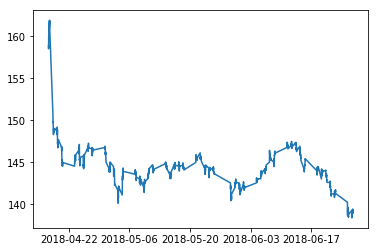

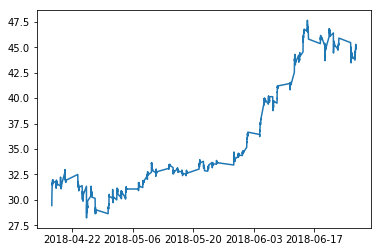

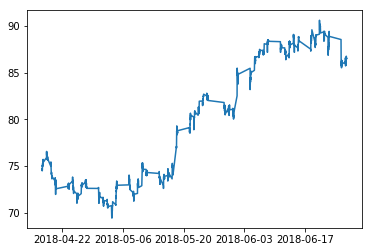

In [51]:
plt.plot(ibm_price['Open'])
plt.show()
plt.plot(TWTR_price_data['Open'])
plt.show()
plt.plot(dell_price['Open'])
plt.show()


In [ ]:
for i, bot in enumerate(bots):
    total_fitness(bot,data_test)
    

5943.5896
5915.1025
5582.0936
5781.4263
5598.0809
